In [2]:
!mim search mmdet --model "mask r-cnn"

--------------------------------------------------------------------------------
config id: mask_rcnn_convnext-t_p4_w7_fpn_fp16_ms-crop_3x_coco
architecture                                            convnext
coco/box_ap                                             46.2
coco/mask_ap                                            41.7
config                                                  configs/convnext/mask...
epochs                                                  36
model                                                   mask r-cnn
paper                                                   URL,Title
readme                                                  configs/mask_rcnn/REA...
training_data                                           coco
training_memory(GB)                                     7.3
training_resources                                      8x a100 gpus
training_techniques                                     adamw,mixed precision...
weight                                      

In [3]:
! mim download mmdet --config mask_rcnn_r50_fpn_1x_coco --dest .

processing mask_rcnn_r50_fpn_1x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 MiB 3.8 MB/s eta 0:00:0000:0100:02
Successfully downloaded mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth to /output/balloon-detection
Successfully dumped mask_rcnn_r50_fpn_1x_coco.py to /output/balloon-detection


In [7]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import warnings
warnings.filterwarnings("ignore")

In [16]:
config_file = "mask_rcnn_r50_fpn_1x_coco.py"
checkpoint_file = "mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth"
img = 'mmdetection/demo/demo.jpg'
device = 'cuda:0'

In [9]:
help(init_detector)

Help on function init_detector in module mmdet.apis.inference:

init_detector(config, checkpoint=None, device='cuda:0', cfg_options=None)
    Initialize a detector from config file.
    
    Args:
        config (str, :obj:`Path`, or :obj:`mmcv.Config`): Config file path,
            :obj:`Path`, or the config object.
        checkpoint (str, optional): Checkpoint path. If left as None, the model
            will not load any weights.
        cfg_options (dict): Options to override some settings in the used
            config.
    
    Returns:
        nn.Module: The constructed detector.



In [10]:
help(inference_detector)

Help on function inference_detector in module mmdet.apis.inference:

inference_detector(model, imgs)
    Inference image(s) with the detector.
    
    Args:
        model (nn.Module): The loaded detector.
        imgs (str/ndarray or list[str/ndarray] or tuple[str/ndarray]):
           Either image files or loaded images.
    
    Returns:
        If imgs is a list or tuple, the same length list type results
        will be returned, otherwise return the detection results directly.



In [11]:
help(show_result_pyplot)

Help on function show_result_pyplot in module mmdet.apis.inference:

show_result_pyplot(model, img, result, score_thr=0.3, title='result', wait_time=0, palette=None, out_file=None)
    Visualize the detection results on the image.
    
    Args:
        model (nn.Module): The loaded detector.
        img (str or np.ndarray): Image filename or loaded image.
        result (tuple[list] or list): The detection result, can be either
            (bbox, segm) or just bbox.
        score_thr (float): The threshold to visualize the bboxes and masks.
        title (str): Title of the pyplot figure.
        wait_time (float): Value of waitKey param. Default: 0.
        palette (str or tuple(int) or :obj:`Color`): Color.
            The tuple of color should be in BGR order.
        out_file (str or None): The path to write the image.
            Default: None.



In [13]:
model = init_detector(config_file, checkpoint_file, device=device)

load checkpoint from local path: mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth


In [17]:
res = inference_detector(model, img)

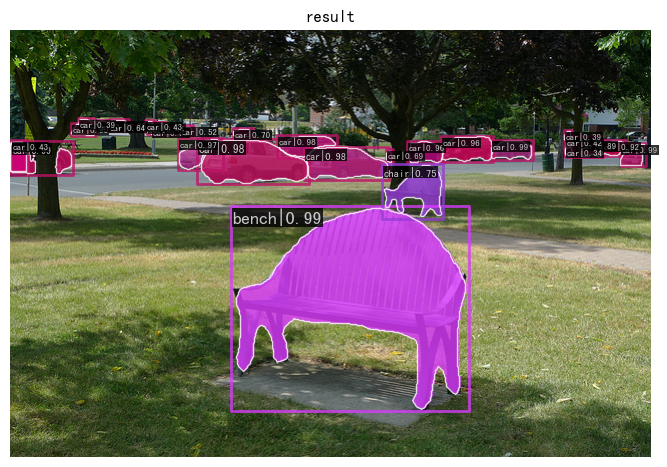

In [18]:
show_result_pyplot(model, img, res, score_thr=0.3, title='result', wait_time=0, palette=None, out_file=None)